# Installing library for Latent Dirichlet Allocation(LDA)

In [0]:
!pip install pyLDAvis

# Necessary Imports to load libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.stem import WordNetLemmatizer
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
n = 1000

# To fix the compatibility issue, we installed tensorflow version 1.15 instead of 2.0

In [0]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 33kB/s 
     |████████████████████████████████| 3.8MB 45.2MB/s 
     |████████████████████████████████| 512kB 40.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=add4070ad17ad28bb567af39e5ad3002b78ec77fa22c8db04f9ad0e294b8b924
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installatio

In [0]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.1MB/s 


# Imports for Tensorflow

In [0]:
import tensorflow as tf
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling
import numpy as np
import itertools

# Downloading and Importing stopwords that need to be filtered out

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results', 
                   'purpose', 'materials', 'discussions','methodology','result analysis'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reading required CSV files

In [0]:
biorxiv_clean = pd.read_csv('biorxiv_clean.csv')
clean_noncomm_use = pd.read_csv('clean_noncomm_use.csv')
clean_comm_use =  pd.read_csv('clean_comm_use.csv')
clean_pmc =  pd.read_csv('clean_pmc.csv')

# First two rows of all CSV files

In [0]:
biorxiv_clean.head(2)

NameError: ignored

In [0]:
clean_comm_use.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,8d095d0275e474dbb9d9b63a75591ff2c0667d73,Evidence of Recombination and Genetic Diversit...,"Ting Huang, Wei Wang, Mael Bessaud, Peijun Ren...","Ting Huang (Unit of Emerging Viruses, Shanghai...",Abstract\n\nBackground: Human rhinoviruses (HR...,Introduction\n\nHuman rhinoviruses (HRVs) are ...,"Rhinovirus and the lower respiratory tract, F ...","[{'first': 'Ting', 'middle': [], 'last': 'Huan...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Rhinovi..."
1,43918c75d7b7d3f9402b1342dfea1e19eb2bd909,Antibacterial Properties of Visible-Light-Resp...,"Der-Shan Sun, Jyh-Hwa Kau, Hsin-Hsien Huang, Y...","Der-Shan Sun (Tzu-Chi University, 97004, Huali...",Abstract\n\nThe bactericidal activity of conve...,Introduction\n\nAnthrax is a life-threatening ...,"Anthrax in humans and animals, , Anthrax in Hu...","[{'first': 'Der-Shan', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Anthrax..."


In [0]:
clean_noncomm_use.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,cd92f91038067e7a10aa27d676ce696e1e4d67ce,EXPERIMENTAL AND THERAPEUTIC MEDICINE Dimethyl...,"Zhen-Hong Zhu, Wen-Qi Song, Chang-Qing Zhang, ...","Zhen-Hong Zhu (Shanghai Jiao Tong University, ...",Abstract\n\nMesenchymal stem cells have been w...,Introduction\n\nOsteonecrosis of the femoral h...,Avascular necrosis of the femoral head: Vascul...,"[{'first': 'Zhen-Hong', 'middle': [], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Avascul..."
1,bab279da548d8bd363acd5033e9dc54e7dbb7107,Effects of school breaks on influenza- like il...,"Yanhui Chu, Zhenyu Wu, Jiayi Ji, Jingyi Sun, X...","Yanhui Chu, Zhenyu Wu (Fudan University, Shang...",NaN,INTRODUCTION\n\nSchoolchildren play a major ro...,Estimating household and community transmissio...,"[{'first': 'Yanhui', 'middle': [], 'last': 'Ch...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Estimat..."


In [0]:
clean_pmc.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,14572a7a9b3e92b960d92d9755979eb94c448bb5,Immune Parameters of Dry Cows Fed Mannan Oligo...,"S T Franklin, M C Newman, K E Newman, K I Meek","S T Franklin (University of Kentucky, 40546-02...",Abstract\n\nThe objective of this study was to...,INTRODUCTION\n\nThe periparturient period is a...,Immune response of pregnant heifers and cows t...,"[{'first': 'S', 'middle': ['T'], 'last': 'Fran...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Immune ..."
1,bb790e8366da63c4f5e2d64fa7bbd5673b93063c,Discontinuous Transcription or RNA Processing ...,"Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...","Beate Schwer, Paolo Vista, Jan C Vos, Hendrik ...",NaN,Discontinuous\n\nTranscription or RNA Processi...,Poly (riboadenylic acid) preferentially inhibi...,"[{'first': 'Beate', 'middle': [], 'last': 'Sch...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Poly (r..."


# Setting Up The Parameter For Better Vizulization Of Keywords 

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=5,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# Plotting The Keywords

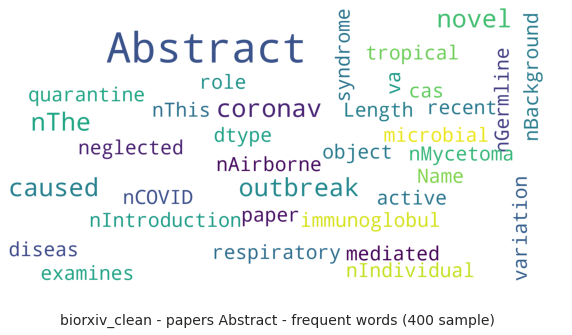

In [0]:
show_wordcloud(biorxiv_clean['abstract'], title = 'biorxiv_clean - papers Abstract - frequent words (400 sample)')

# Dropping common word 'Abstract' which is there in every published paper

In [0]:
df = biorxiv_clean
df = df.abstract.dropna()
data = df.values.tolist()

In [0]:
simsentence = pd.read_csv('/content/drive/My Drive/simsentence.csv')

In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(data))

print(data_words[:1])

[['abstract', 'airborne', 'mediated', 'microbial', 'diseases', 'such', 'as', 'influenza', 'and', 'tuberculosis', 'represent', 'major', 'public', 'health', 'challenges', 'direct', 'approach', 'to', 'prevent', 'airborne', 'transmission', 'is', 'inactivation', 'of', 'airborne', 'pathogens', 'and', 'the', 'airborne', 'antimicrobial', 'potential', 'of', 'uvc', 'ultraviolet', 'light', 'has', 'long', 'been', 'established', 'however', 'its', 'widespread', 'use', 'in', 'public', 'settings', 'is', 'limited', 'because', 'conventional', 'uvc', 'light', 'sources', 'are', 'both', 'carcinogenic', 'and', 'cataractogenic', 'by', 'contrast', 'we', 'have', 'previously', 'shown', 'that', 'far', 'uvc', 'light', 'nm', 'efficiently', 'kills', 'bacteria', 'without', 'harm', 'to', 'exposed', 'mammalian', 'skin', 'this', 'is', 'because', 'due', 'to', 'its', 'strong', 'absorbance', 'in', 'biological', 'materials', 'far', 'uvc', 'light', 'cannot', 'penetrate', 'even', 'the', 'outer', 'non', 'living', 'layers', 'o

# All Possible Word Pairs(Bigram, Trigram) Formed From Neighboring Words

In [0]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20)
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['abstract', 'introduction', 'more_than', 'cases', 'of', 'coronavirus_disease', 'have_been_reported', 'worldwide', 'we_describe', 'the', 'epidemiology', 'clinical', 'course', 'and', 'virologic', 'characteristics', 'of', 'the', 'first', 'patients', 'with', 'covid', 'we', 'collected', 'demographic', 'exposure', 'and', 'clinical', 'information', 'from', 'patients', 'confirmed', 'by', 'cdc', 'during', 'january', 'february', 'to', 'have', 'covid', 'respiratory', 'stool', 'serum', 'and', 'urine', 'specimens', 'were', 'submitted', 'for', 'sars_cov', 'rrt', 'pcr', 'testing', 'virus', 'culture', 'and', 'whole_genome', 'sequencing', 'results', 'among', 'the', 'patients', 'median_age_was', 'years', 'range', 'were', 'male', 'had', 'traveled', 'to', 'china', 'and', 'two', 'were', 'contacts', 'of', 'patients', 'in', 'this', 'series', 'commonly', 'reported', 'signs', 'and', 'symptoms', 'at', 'illness_onset', 'were', 'fever', 'and', 'cough', 'seven', 'patients', 'were', 'hospitalized', 'with', 'radiog

# Defining Functions To Return Word Pairs

In [0]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Lemmatization: Grouping Together The Inflected Forms Of A Word

In [0]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

['report', 'worldwide', 'describe', 'epidemiology', 'clinical', 'course', 'virologic', 'characteristic', 'first', 'patient', 'collect', 'demographic', 'exposure', 'clinical', 'information', 'patient', 'confirm', 'stool', 'serum', 'specimen', 'submit', 'virus', 'culture', 'sequence', 'patient', 'year', 'range', 'travel', 'contact', 'patient', 'series', 'commonly', 'report', 'sign', 'symptom', 'patient', 'hospitalize', 'radiographic', 'evidence', 'demonstrate', 'clinical', 'laboratory', 'sign', 'worsen', 'second', 'week', 'illness', 'treat', 'investigational', 'antiviral', 'patient', 'detect', 'respiratory', 'specimen', 'typically', 'week', 'low', 'rrt', 'value', 'often', 'detect', 'first', 'week', 'detect', 'report', 'symptom', 'resolution', 'patient', 'cultured', 'specimen', 'detect', 'stool', 'patient', 'patient', 'mild', 'moderately', 'viable', 'virus', 'detect', 'early', 'prolonged', 'detection', 'suggest', 'window', 'diagnosis', 'long', 'hospitalized_patient', 'show', 'sign', 'wors

In [0]:
print(data_lemmatized[:1])

[['mediate', 'microbial', 'disease', 'influenza', 'tuberculosis', 'represent', 'major', 'challenge', 'direct', 'approach', 'prevent', 'airborne', 'transmission', 'inactivation', 'airborne', 'pathogen', 'ultraviolet', 'light', 'long', 'establish', 'however', 'widespread', 'use', 'public', 'setting', 'limit', 'conventional', 'light', 'source', 'carcinogenic', 'cataractogenic', 'contrast', 'previously', 'show', 'far', 'light', 'efficiently', 'kill', 'bacteria', 'harm', 'expose', 'mammalian', 'skin', 'due', 'strong', 'absorbance', 'biological', 'far', 'light', 'can', 'penetrate', 'even', 'outer', 'non', 'live', 'layer', 'human', 'skin', 'eye', 'however', 'bacteria', 'virus', 'micrometer', 'small', 'dimension', 'far', 'penetrate', 'show', 'first', 'time', 'far']]


In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 4), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]]


In [0]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('absorbance', 1),
  ('airborne', 2),
  ('approach', 1),
  ('bacteria', 2),
  ('biological', 1),
  ('can', 1),
  ('carcinogenic', 1),
  ('cataractogenic', 1),
  ('challenge', 1),
  ('contrast', 1),
  ('conventional', 1),
  ('dimension', 1),
  ('direct', 1),
  ('disease', 1),
  ('due', 1),
  ('efficiently', 1),
  ('establish', 1),
  ('even', 1),
  ('expose', 1),
  ('eye', 1),
  ('far', 4),
  ('first', 1),
  ('harm', 1),
  ('however', 2),
  ('human', 1),
  ('inactivation', 1),
  ('influenza', 1),
  ('kill', 1),
  ('layer', 1),
  ('light', 4),
  ('limit', 1),
  ('live', 1),
  ('long', 1),
  ('major', 1),
  ('mammalian', 1),
  ('mediate', 1),
  ('microbial', 1),
  ('micrometer', 1),
  ('non', 1),
  ('outer', 1),
  ('pathogen', 1),
  ('penetrate', 2),
  ('prevent', 1),
  ('previously', 1),
  ('public', 1),
  ('represent', 1),
  ('setting', 1),
  ('show', 2),
  ('skin', 2),
  ('small', 1),
  ('source', 1),
  ('strong', 1),
  ('time', 1),
  ('transmission', 1),
  ('tuberculosis', 1),
  ('ul

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

In [0]:
doc_lda = lda_model[corpus]

In [0]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.722331874206228

Coherence Score:  0.46715304565993143


In [0]:
%%time
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

CPU times: user 5.63 s, sys: 259 ms, total: 5.89 s
Wall time: 9.27 s


In [0]:
pyLDAvis.save_html(vis, './lda4topics_v2.html')

# Printing Weightage For Each Word in All 8 Topics

In [0]:
optimal_model = lda_model

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.012*"link" + 0.012*"epitope" + 0.010*"structure" + 0.010*"disease" + '
  '0.010*"agent" + 0.009*"vaccine" + 0.008*"individual" + 0.008*"interaction" '
  '+ 0.008*"process" + 0.008*"able" + 0.007*"model" + 0.007*"predict" + '
  '0.007*"network" + 0.007*"pathogen" + 0.006*"biological" + 0.006*"may" + '
  '0.006*"system" + 0.006*"population" + 0.006*"approach" + 0.006*"type"'),
 (1,
  '0.042*"virus" + 0.018*"viral" + 0.017*"human" + 0.016*"host" + '
  '0.011*"sequence" + 0.010*"genome" + 0.008*"infection" + 0.008*"may" + '
  '0.008*"show" + 0.008*"protein" + 0.008*"study" + 0.007*"identify" + '
  '0.007*"suggest" + 0.006*"also" + 0.006*"gene" + 0.006*"find" + '
  '0.006*"cause" + 0.006*"coronaviruse" + 0.005*"include" + 0.005*"mutation"'),
 (2,
  '0.031*"cell" + 0.014*"mouse" + 0.012*"expression" + 0.010*"use" + '
  '0.009*"tissue" + 0.009*"level" + 0.009*"cytokine" + 0.008*"significant" + '
  '0.007*"express" + 0.007*"observe" + 0.006*"show" + 0.006*"response" + '
  '0.005*"fin

# Plottind Keywords As Per The Weight For 8 Different Topics And Giving Them A Layout

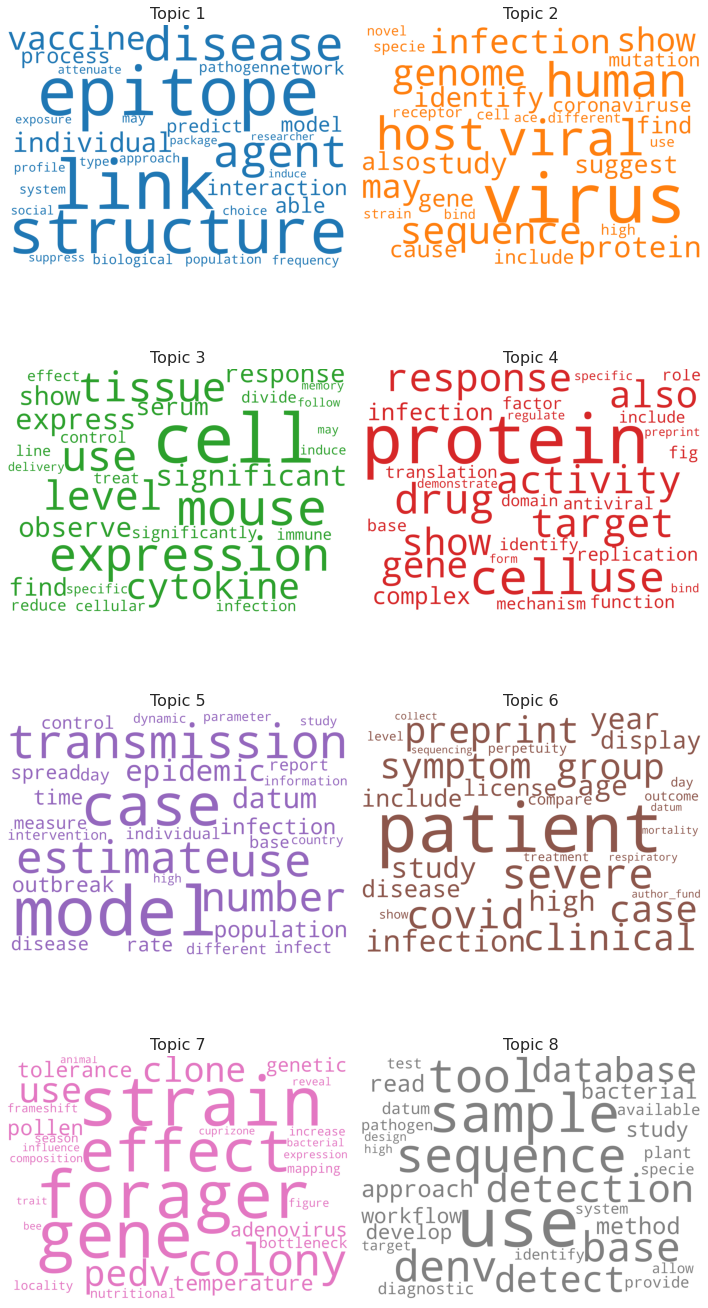

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, 
                               num_words=30)

fig, axes = plt.subplots(4, 2, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()